## OPERA

This dataset is obtained from the Optimizing Patient Experience and Response to Topical Analgesics (OPERA) study.



It consists in 631 patients with 50 survey questions. The objective is to investigate the effect of replacing opioid therapies with topical analgesics on patients with chronic pain and record the changes in multiple aspects of their life such as pain and medicine reduction, interference with everyday activities, and reduction of complaints. 


[Gudin JA, Brennan MJ, Harris ED et al.  Changes in pain and concurrent pain medication use following compounded topical analgesic treatment for chronic pain: 3- and 6-month follow-up results from the prospective, observational optimizing patient experience and response to topical analgesics study. J Pain Res 2017;10:2341–54.](https://www.tandfonline.com/doi/full/10.2147/JPR.S143513)


---

You can also see a state of the art utilization of this dataset in *MEvA-X: a hybrid multiobjective evolutionary tool using an XGBoost classifier for biomarkers discovery on biomedical datasets* (https://doi.org/10.1093/bioinformatics/btad384 and https://github.com/PanKonstantinos/MEvA-X).


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv("/Users/subasrees/Desktop/intermediate-machine-learning-training/data/OPERA.csv", index_col=[0,1])
df.index = df.index.droplevel(level=0)

df = df.transpose()
df.head()

Feature,Age,Gender,Least_24h,Average_pain,Current_pain,Overall_Pain_interference,Int_Gen_Activity,Int_Mood,Int_Walking_ability,Int_Work,...,Severity_Score,Tot_Compl_categ,TFFC1,TFFC2,TFFC3,TFFC4,BPISeverityChange,BPIInterferenceChange,ChangeGrandTotalMedicines,ChangeInTotalComplaintsNotIncludingOther
SM.1,0.396040,1.0,0.0,0.2,0.0,1.0,0.1,0.2,0.0,0.1,...,0.225,0.25,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
SM.2,0.930733,1.0,0.7,0.7,1.0,0.7,0.9,0.7,0.9,0.9,...,0.850,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SM.3,0.517688,1.0,0.3,0.4,0.4,0.8,0.4,0.4,0.2,0.5,...,0.525,0.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
SM.4,0.606992,0.0,0.4,0.2,0.5,0.8,0.2,0.2,0.0,0.1,...,0.475,0.25,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SM.5,0.801118,0.0,0.1,0.2,0.0,0.0,0.5,0.5,0.5,0.5,...,0.175,0.25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


This dataset has already been preprocessed with a KNN imputation and a min-max scaling normalizing each feature to the [0,1] range.


The dataset contains 50 features and 4 targets.

Here is a brief description:

Base demographics:
 * Age
 * Gender
 
Brief Pain Index ([example of form](https://www.npcrc.org/files/news/briefpain_short.pdf)):
 * Pain_other : 0/1 for presence of pain other than "usual" minor pains of daily life
 * Worst_24h
 * Least_24h
 * Average_pain
 * Current_pain
 * Severity_Score
 * Overall_Pain_interference
 * Avg_Interference
 * Int_Gen_Activity
 * Int_Mood
 * Int_Walking_ability
 * Int_Work
 * Int_Relationship
 * Int_Sleep
 * Int_Life_enjoyment
 
Complaint about different types of pain sources (*_bin*: 0/1 for presence of complaint ; *_categ* or *_cat*: number of complaints) :
 * Arthritis
 * NeuroRadic : neuropathy or radiculopathy pain
 * MyoMuscul :  myofascial or musculoskeletal pain
 * Tendinitis
 * Other
 * Pain_categ : number of pain categories with complaints
 * Tot_Compl_categ : same as above, but without other
 * Grand_Tot_Compl : total number of complaints (except other)

Which formulation of a topical pain medication was given to the patient (this can be considered the intervention of the study):
 * TFFC1
 * TFFC2
 * TFFC3
 * TFFC4

Additional Medication taken:
 * Meds_3days : 0/1 for medication taken in the last 3 days
 * Categ_of_meds : number of medication categories taken in the last 3 days
 * OTC : Over The Counter medications
 * AntiInflam : aintiinflammatory meds (also includes a total weight taken column)
 * Opioids_No_Anticonvulsants
 * Narcotic (also includes a total weight taken column)
 * Opioid_comb and Opioid_others : counts of different subsets of opioids 
 * Not_on_Anticonvulsant : 0/1 presence of anticonvulsant
 * Grand_Tot_Med : total number of medication taken


Finally, the different targets in this dataset are measured improvement between the baseline and the follow-up time:
 * BPISeverityChange : change in pain severity
 * BPIInterferenceChange : change in pain interference
 * ChangeGrandTotalMedicines : change in total medicine taken
 * ChangeInTotalComplaintsNotIncludingOther : change in number of complaints


In [3]:
targets = ['BPISeverityChange','BPIInterferenceChange', 
           'ChangeGrandTotalMedicines','ChangeInTotalComplaintsNotIncludingOther']

In [4]:
X = df.drop(columns=targets)
Y = df[targets]

## small EDA

In [5]:
for c in Y.columns:
    #sns.kdeplot( Y[c] )
    print("***")
    print(Y[c].value_counts())
    

***
BPISeverityChange
0.0    506
1.0    125
Name: count, dtype: int64
***
BPIInterferenceChange
0.0    523
1.0    108
Name: count, dtype: int64
***
ChangeGrandTotalMedicines
0.0    581
1.0     50
Name: count, dtype: int64
***
ChangeInTotalComplaintsNotIncludingOther
0.0    481
1.0    150
Name: count, dtype: int64


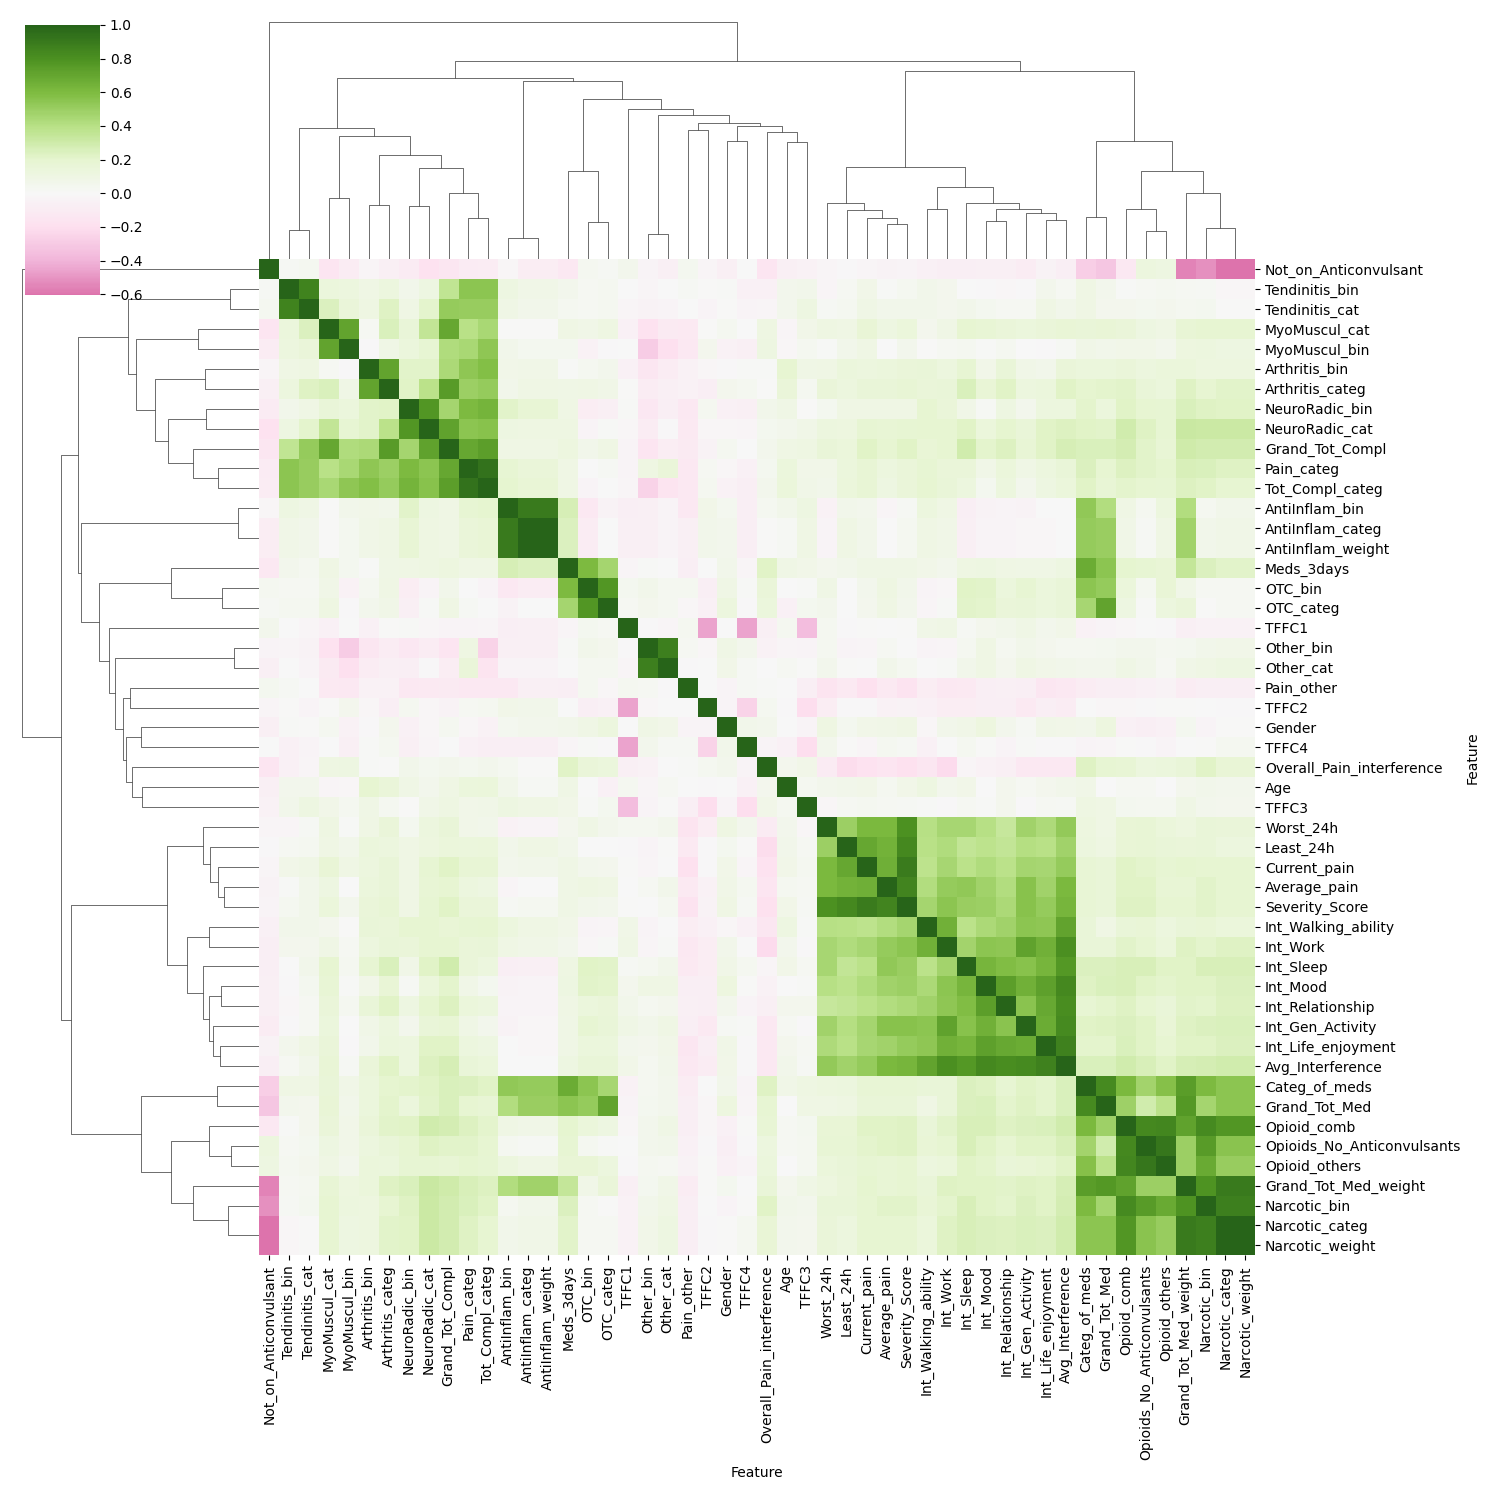

In [6]:
sns.clustermap( X.corr() ,
              figsize=(15, 15),
              cmap = "PiYG" , center = 0)

As we can see, a few columns are highly correlated (>0.9)

Text(0, 0.5, 'explained variance ratio')

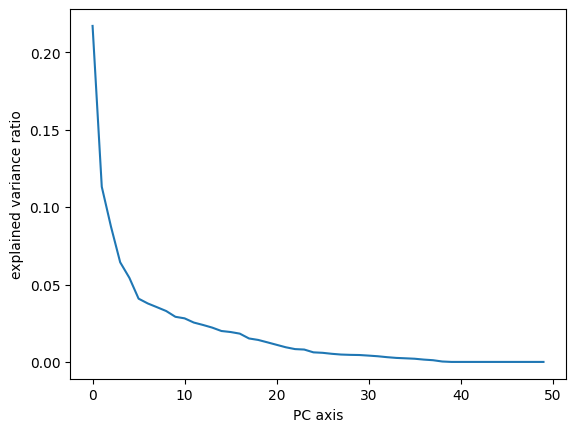

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc = StandardScaler()
pca = PCA()

x_pca = pca.fit_transform( sc.fit_transform(X) )


plt.plot( pca.explained_variance_ratio_ )
plt.xlabel("PC axis")
plt.ylabel("explained variance ratio")

In [8]:
import numpy as np

y = []

for i in range(4):
    y.append(Y.iloc[:,i])

print(y[3])  # array for i=2


SM.1      1.0
SM.2      0.0
SM.3      0.0
SM.4      0.0
SM.5      0.0
         ... 
SM.627    1.0
SM.628    0.0
SM.629    0.0
SM.630    0.0
SM.631    0.0
Name: ChangeInTotalComplaintsNotIncludingOther, Length: 631, dtype: float64


<Axes: >

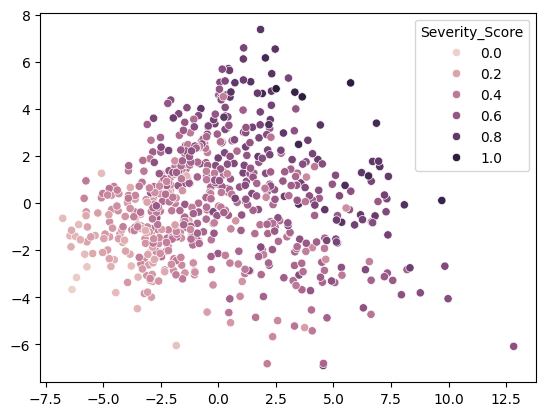

In [9]:
sns.scatterplot( x = x_pca[:,0] , y = x_pca[:,1] , hue = X.Severity_Score)

We encourage you to play with the plot above, color according to the different targets or columns, show different PC axes, ...


## your mission

Choose one of the target and train a classifier to predict it.

Try to see if you can gain some insight on the data by interpreting your model.

> Remember to respect ML best practices (train/test separation, cross-validation, use adapted metrics, ...)


In [10]:
#!pip install lightgbm

In [11]:
## load all necessary libraries from scikit
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import (
    roc_curve, auc as sklearn_auc,
    precision_recall_curve, average_precision_score,
    confusion_matrix, ConfusionMatrixDisplay,
    classification_report,f1_score,RocCurveDisplay
)
from sklearn.inspection import permutation_importance

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
import os


In [12]:
# confusion matrix 
def plot_confmat(y_true, y_pred, title="Confusion matrix",savepath=None):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_true))
    ax = disp.plot(values_format="d").ax_
    ax.set_xlabel("Predicted label", fontsize=11)
    ax.set_ylabel("True label", fontsize=11)
    ax.set_title(title)
    plt.xticks(rotation=30,ha='right',fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()

    # SAVE
    if savepath is not None:
        os.makedirs(savepath, exist_ok=True)
        fname = title.replace(" ", "_").lower()
        plt.savefig(
        os.path.join(savepath, f"{fname}.pdf"),
        dpi=300,
        bbox_inches="tight")
        os.makedirs(savepath, exist_ok=True)
        fname = title.replace(" ", "_").lower()
        plt.savefig(
        os.path.join(savepath, f"{fname}.jpg"),
        dpi=300,
        bbox_inches="tight")
        plt.show()


In [13]:
# AUC-ROC curves
def plot_roc_if_binary(model, X_test, y_test, title="ROC",savepath=None):
    classes = np.unique(y_test)
    if len(classes) != 2:
        return
    # prob for positive class (classes[1])
    y_prob = model.predict(X_test)
    auc = roc_auc_score(y_test, y_prob)

    # Probabilities for ROC/PR
    proba = model.predict(X_test)
    pred  = (proba >= 0.5).astype(int)

    print(classification_report(y_test, pred, digits=3))
    # PR
    prec, rec, _ = precision_recall_curve(y_test, proba)
    ap = average_precision_score(y_test, proba)
    # ROC
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = sklearn_auc(fpr, tpr)
    RocCurveDisplay.from_predictions(y_test, y_prob)
    plt.title(f"{title} (AUC={auc:.3f})")
    plt.plot(fpr, tpr, label=f"AUC={roc_auc:.3f}")
    plt.plot([0,1],[0,1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    # SAVE
    if savepath is not None:
        os.makedirs(savepath, exist_ok=True)
        fname = title.replace(" ", "_").lower()
        plt.savefig(
            os.path.join(savepath, f"{fname}.pdf"),
            dpi=300,
            bbox_inches="tight")
        plt.savefig(
            os.path.join(savepath, f"{fname}.jpg"),
            dpi=300,
            bbox_inches="tight")
        plt.show()



In [14]:
# do imputing and scaling of data
preprocess = [
    ("imputer", SimpleImputer(strategy="constant", fill_value=0.0)),
    ("scaler", StandardScaler())]

In [15]:
import pandas as pd

# Assuming X is your DataFrame of features
corr_matrix = X.corr().abs()  # absolute value of correlation

upper = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Features to drop due to high correlation:", to_drop)
X_reduced = X.drop(columns=to_drop)

Features to drop due to high correlation: ['AntiInflam_categ', 'AntiInflam_weight', 'Narcotic_categ', 'Narcotic_weight', 'Tendinitis_cat', 'Other_cat', 'Grand_Tot_Med', 'Grand_Tot_Med_weight', 'Avg_Interference', 'Opioid_comb', 'Opioid_others', 'Severity_Score', 'Tot_Compl_categ']


In [16]:
# splitting traing and test, along with a validation set from training set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y[3], test_size=0.2, stratify=y[3], random_state=42
)


In [17]:
pipe=  Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value=0.0)),
        ("clf", XGBClassifier(
            n_estimators=400,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="binary:logistic",
            eval_metric="mlogloss",
            random_state=42,
            n_jobs=-1
        ))
])

In [18]:
param_grids = {
        "clf__n_estimators": [200, 400],
        "clf__max_depth": [4, 6],
        "clf__learning_rate": [0.05, 0.1],
        "clf__subsample": [0.8],
        "clf__colsample_bytree": [0.8]
}

In [19]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

base_pipe = pipe
grid = param_grids
gs = GridSearchCV(
        base_pipe,
        param_grid=grid,
        scoring="f1_macro",
        cv=cv,
        n_jobs=-1)
gs.fit(X_train, y_train)

print("Best CV macro-F1:", round(gs.best_score_, 3))
print("Best params:", gs.best_params_)

Best CV macro-F1: 0.6
Best params: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.05, 'clf__max_depth': 4, 'clf__n_estimators': 400, 'clf__subsample': 0.8}



XGB TEST macro-F1 = 0.5753
              precision    recall  f1-score   support

         0.0      0.793     0.907     0.846        97
         1.0      0.438     0.233     0.304        30

    accuracy                          0.748       127
   macro avg      0.615     0.570     0.575       127
weighted avg      0.709     0.748     0.718       127



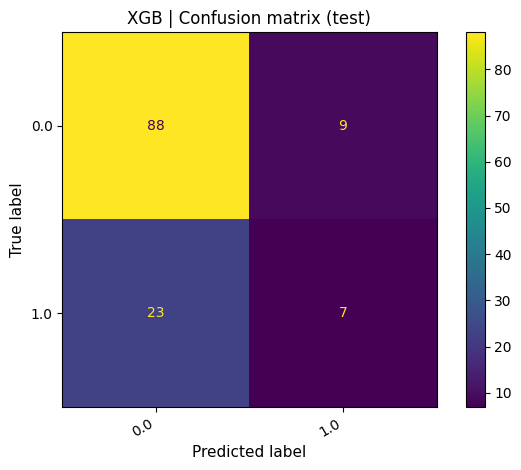

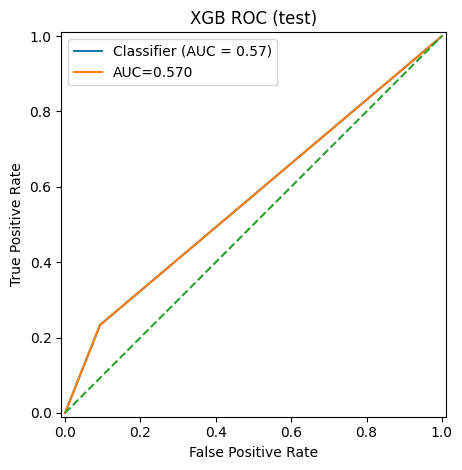

In [20]:
best_pipe = gs.best_estimator_
name='XGB'
y_pred = best_pipe.predict(X_test)
mf1 = f1_score(y_test, y_pred, average="macro")

print("\n" + "="*70)
print(name, "TEST macro-F1 =", round(mf1, 4))

plot_confmat(y_test, y_pred, title=f"{name} | Confusion matrix (test)", savepath=None)
plot_roc_if_binary(best_pipe, X_test, y_test, title=f"{name} ROC (test)")


In [21]:
import numpy as np
import pandas as pd
import shap

def shap_xgb_multiclass(best_pipe, X_train, X_test, feature_names, class_names):
    """
    best_pipe: fitted sklearn Pipeline with ["imputer", "clf"] where clf is XGBClassifier
    X_train/X_test: raw feature matrices (DataFrame or ndarray)
    feature_names: list of names in correct order
    class_names: e.g. ['Extreme hypoxia','Hypoxia','Normoxia'] in encoder order
    """
    imputer = best_pipe.named_steps["imputer"]
    model   = best_pipe.named_steps["clf"]

    # Apply same preprocessing used in training
    Xtr = imputer.transform(X_train)
    Xte = imputer.transform(X_test)

    # TreeExplainer for XGBoost
    explainer = shap.TreeExplainer(model)

    # Multiclass: SHAP returns list OR array depending on shap version.
    shap_vals = explainer.shap_values(Xte)

    # Normalize output format to: (n_classes, n_samples, n_features)
    if isinstance(shap_vals, list):
        shap_arr = np.stack(shap_vals, axis=0)
    else:
        shap_arr = np.asarray(shap_vals)
    if shap_arr.ndim == 3 and shap_arr.shape[-1] == len(class_names):
        shap_arr = np.transpose(shap_arr, (2, 0, 1))


    # Per-class mean(|SHAP|)
    per_class = {}
    for i, cls in enumerate(class_names):
        per_class[cls] = pd.Series(np.mean(np.abs(shap_arr[i]), axis=0), index=feature_names) \
                            .sort_values(ascending=False)

    if len(class_names) == 2:
        per_class = {
    class_names[1]: pd.Series(np.mean(shap_arr, axis=0), index=feature_names).sort_values(ascending=False),
    class_names[0]: pd.Series(-np.mean(shap_arr, axis=0), index=feature_names).sort_values(ascending=False)
}


    # Overall importance (mean over classes)
    overall = pd.Series(np.mean(np.abs(shap_arr), axis=0), index=feature_names).sort_values(ascending=False)


    return overall, per_class, explainer, shap_arr, Xte


/Users/subasrees/Desktop/anaconda3/envs/intermediateML_2024/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
xgb_overall, xgb_per_class, explainer, shap_arr, Xte = shap_xgb_multiclass(
    best_pipe,
    X_train,
    X_test,
    feature_names=X.columns,
    class_names=["No","Yes"],
)

print("Top 25 overall SHAP features:")
print(xgb_overall.head(25))

print("\nTop 20 features for each class:")
for cls, s in xgb_per_class.items():
    print("\n", cls)
    print(s.head(20))


Top 25 overall SHAP features:
Feature
Grand_Tot_Compl              1.072409
Age                          0.382389
Worst_24h                    0.373776
Int_Walking_ability          0.282703
Int_Life_enjoyment           0.265131
Int_Sleep                    0.245313
Grand_Tot_Med                0.230063
Avg_Interference             0.225042
Current_pain                 0.221228
Int_Gen_Activity             0.207197
TFFC1                        0.177194
Severity_Score               0.169593
Overall_Pain_interference    0.168528
Least_24h                    0.162189
Int_Mood                     0.160361
Int_Work                     0.151681
Arthritis_bin                0.149724
Other_bin                    0.147364
Arthritis_categ              0.146925
NeuroRadic_cat               0.146433
Tendinitis_bin               0.141496
TFFC4                        0.130359
OTC_bin                      0.126408
Gender                       0.123155
Grand_Tot_Med_weight         0.120555
dtype: float

In [23]:
import numpy as np
import shap
import matplotlib.pyplot as plt
def plot_shap_results(explainer, shap_arr, Xte, feature_names,
                      class_names=None, plot_type="summary",
                      class_idx=0, sample_idx=None):
    
    shap_arr = np.array(shap_arr)

    # ---- Handle shapes safely ----
    if shap_arr.ndim == 3:
        # (n_classes, n_samples, n_features)
        shap_values = shap_arr[class_idx]
        class_label = class_names[class_idx] if class_names else f"Class {class_idx}"
    elif shap_arr.ndim == 2:
        # (n_samples, n_features) → binary already flattened
        shap_values = shap_arr
        class_label = class_names[1] if class_names and len(class_names)==2 else "Positive Class"
    else:
        raise ValueError(f"Unexpected SHAP shape: {shap_arr.shape}")

    print("SHAP values shape used for plotting:", shap_values.shape)

    # ---- Plotting ----
    if plot_type == "summary":
        shap.summary_plot(
            shap_values,
            Xte,
            feature_names=feature_names
        )

    elif plot_type == "bar":

        # For binary case
        if shap_arr.ndim == 3:
            shap_values = shap_arr[0]
        else:
            shap_values = shap_arr

        # Build Explanation object
        explanation = shap.Explanation(
            values=shap_values,
            data=Xte,
            feature_names=feature_names
        )

        clustering = shap.utils.hclust(Xte)

        shap.plots.bar(
            explanation,
            clustering=clustering
        )


    elif plot_type == "force":
        if sample_idx is None:
            raise ValueError("Provide sample_idx for force plot")

        shap.initjs()
        return shap.force_plot(
            explainer.expected_value if shap_arr.ndim == 2 else explainer.expected_value[class_idx],
            shap_values[sample_idx],
            Xte[sample_idx],
            feature_names=feature_names
        )

    else:
        raise ValueError("plot_type must be 'summary', 'bar', or 'force'")


SHAP values shape used for plotting: (127, 50)


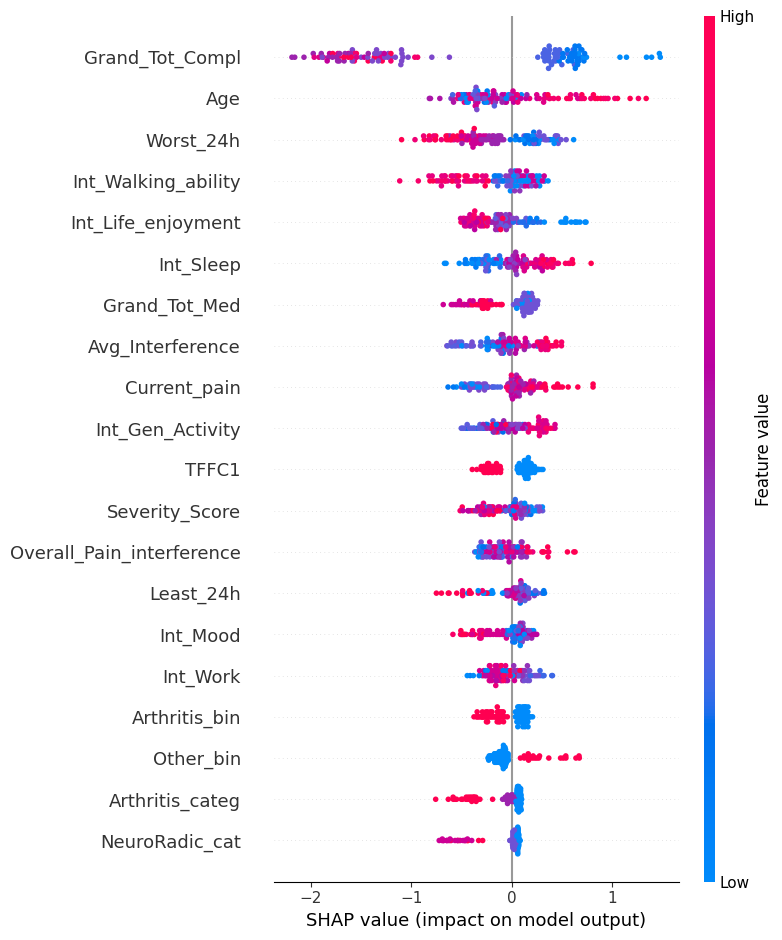

In [24]:
plot_shap_results(explainer, shap_arr, Xte, feature_names=X.columns, class_names=['No','Yes'], plot_type="summary"
)


SHAP values shape used for plotting: (127, 50)


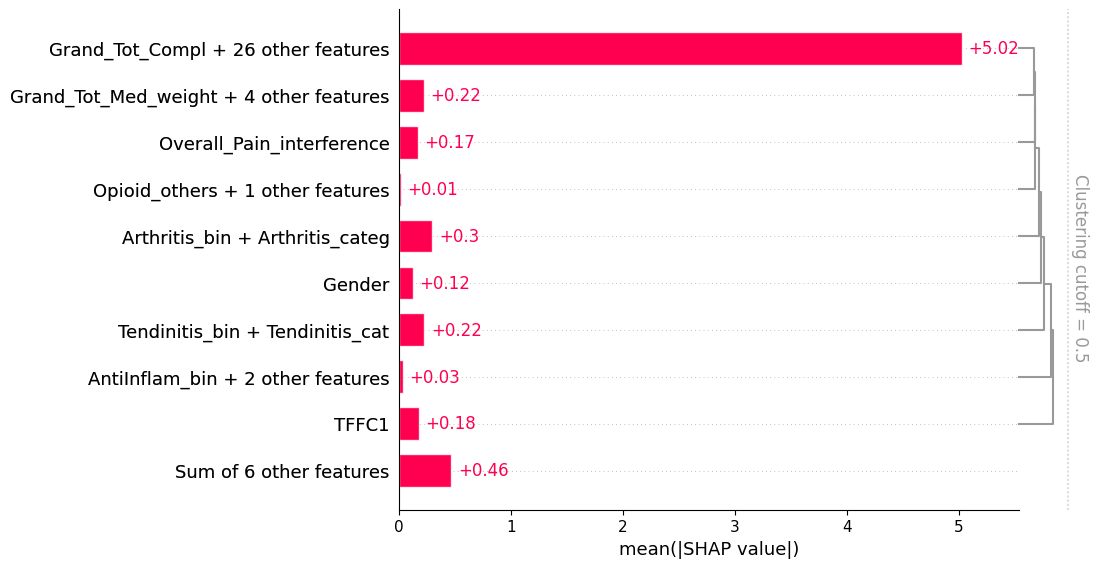

In [25]:
plot_shap_results(explainer, shap_arr, Xte, feature_names=X.columns, class_names=['No','Yes'], plot_type="bar")


In [26]:
plot_shap_results(
    explainer,
    shap_arr,
    Xte,
    feature_names=X.columns,
    class_names=["No","Yes"],
    plot_type="force",
    sample_idx=0
)


SHAP values shape used for plotting: (127, 50)


In [27]:
param_grids_new = {
    "LogReg": {
        "clf__C": [0.1, 1.0, 10.0]
    },
    "SVM_RBF": {
        "clf__C": [1, 5, 10],
        "clf__gamma": ["scale", 0.1, 0.01]
    },
    "RF": {
        "clf__n_estimators": [300, 500],
        "clf__max_depth": [None, 10, 20]
    },
    "GB": {
        "clf__learning_rate": [0.05, 0.1],
        "clf__n_estimators": [200, 400],
        "clf__max_depth": [2, 3]
    },
    "HGB": {
        "clf__learning_rate": [0.03, 0.05, 0.1],
        "clf__max_depth": [4, 6, None],
        "clf__max_iter": [200, 400]
    },
    "LGBM": {
        "clf__n_estimators": [200, 400],
        "clf__learning_rate": [0.05, 0.1],
        "clf__max_depth": [-1, 4, 6],     # -1 = no limit
        "clf__subsample": [0.8],
        "clf__colsample_bytree": [0.8],
        "clf__num_leaves": [31, 63],
    }
}


In [28]:
models = {
    "LogReg": Pipeline(preprocess + [
        ("clf", LogisticRegression(
            C=1.0, solver="lbfgs",
            class_weight="balanced",
            max_iter=2000
        ))
    ]),
    "SVM_RBF": Pipeline(preprocess + [
        ("clf", SVC(
            kernel="rbf",
            C=5.0, gamma="scale",
            probability=True,
            class_weight="balanced",
            random_state=42
        ))
    ]),
    "RF": Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value=0.0)),
        ("clf", RandomForestClassifier(
            n_estimators=500,
            class_weight="balanced",
            random_state=42
        ))
    ]),
    "GB": Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value=0.0)),
        ("clf", GradientBoostingClassifier(random_state=42))
    ]),
    "HGB": Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value=0.0)),
        ("clf", HistGradientBoostingClassifier(
            learning_rate=0.05, max_depth=6, max_iter=400,
            random_state=42
        ))
    ]),
    "LGBM": Pipeline([
        ("imputer", SimpleImputer(strategy="constant", fill_value=0.0)),
        ("clf", LGBMClassifier(
            objective="multiclass",
            num_class=3,
            n_estimators=400,
            learning_rate=0.05,
            max_depth=-1,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            class_weight="balanced",
            verbose=-1,
            force_row_wise=True
        ))
])
}

In [29]:
grad_models=['LogReg','SVM_RBF','RF','GB','HGB','LGBM']

In [30]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_models = {}
best_scores = {}

for name in grad_models:
    base_pipe = models[name]
    grid = param_grids_new.get(name, None)

    if grid is None:
        print(f"\n{name}: no param grid provided, skipping tuning.")
        best_models[name] = base_pipe
        continue

    print("\n" + "="*70)
    print("Tuning:", name)

    gs = GridSearchCV(
        base_pipe,
        param_grid=grid,
        scoring="f1_macro",
        cv=cv,
        n_jobs=-1
    )

    gs.fit(X_train, y_train)

    score = round(gs.best_score_, 4)

    print("Best CV macro-F1:", score)
    print("Best params:", gs.best_params_)

    best_models[name] = gs.best_estimator_
    best_scores[name] = score


Tuning: LogReg
Best CV macro-F1: 0.6037
Best params: {'clf__C': 10.0}

Tuning: SVM_RBF
Best CV macro-F1: 0.6297
Best params: {'clf__C': 5, 'clf__gamma': 'scale'}

Tuning: RF
Best CV macro-F1: 0.587
Best params: {'clf__max_depth': 10, 'clf__n_estimators': 500}

Tuning: GB
Best CV macro-F1: 0.5953
Best params: {'clf__learning_rate': 0.1, 'clf__max_depth': 2, 'clf__n_estimators': 200}

Tuning: HGB
Best CV macro-F1: 0.6125
Best params: {'clf__learning_rate': 0.05, 'clf__max_depth': 4, 'clf__max_iter': 400}

Tuning: LGBM


/Users/subasrees/Desktop/anaconda3/envs/intermediateML_2024/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/subasrees/Desktop/anaconda3/envs/intermediateML_2024/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/subasrees/Desktop/anaconda3/envs/intermediateML_2024/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/subasrees/Desktop/anaconda3/envs/intermediateML_2024/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/subasrees/Desktop/anaconda3/envs/inte

Best CV macro-F1: 0.623
Best params: {'clf__colsample_bytree': 0.8, 'clf__learning_rate': 0.1, 'clf__max_depth': 4, 'clf__n_estimators': 200, 'clf__num_leaves': 31, 'clf__subsample': 0.8}


In [31]:
top3 = dict(sorted(best_scores.items(), key=lambda x: x[1], reverse=True)[:3])
top3

{'SVM_RBF': np.float64(0.6297),
 'LGBM': np.float64(0.623),
 'HGB': np.float64(0.6125)}

In [32]:
top3_models = {name: best_models[name] for name in top3}


SVM_RBF TEST macro-F1 = 0.6656
              precision    recall  f1-score   support

         0.0      0.844     0.835     0.839        97
         1.0      0.484     0.500     0.492        30

    accuracy                          0.756       127
   macro avg      0.664     0.668     0.666       127
weighted avg      0.759     0.756     0.757       127


LGBM TEST macro-F1 = 0.5828
              precision    recall  f1-score   support

         0.0      0.796     0.887     0.839        97
         1.0      0.421     0.267     0.327        30

    accuracy                          0.740       127
   macro avg      0.609     0.577     0.583       127
weighted avg      0.708     0.740     0.718       127



/Users/subasrees/Desktop/anaconda3/envs/intermediateML_2024/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/subasrees/Desktop/anaconda3/envs/intermediateML_2024/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/subasrees/Desktop/anaconda3/envs/intermediateML_2024/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



HGB TEST macro-F1 = 0.5633
              precision    recall  f1-score   support

         0.0      0.789     0.887     0.835        97
         1.0      0.389     0.233     0.292        30

    accuracy                          0.732       127
   macro avg      0.589     0.560     0.563       127
weighted avg      0.694     0.732     0.707       127



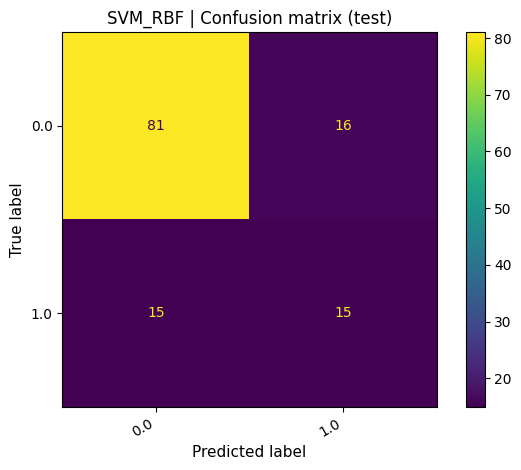

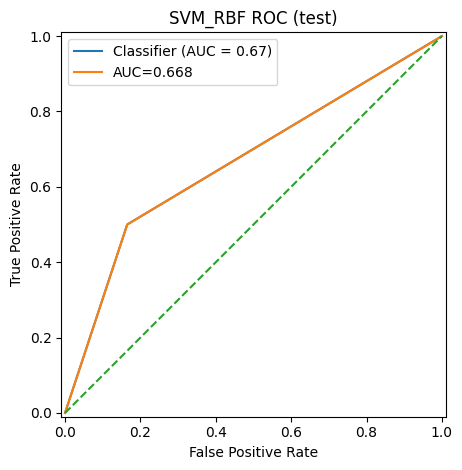

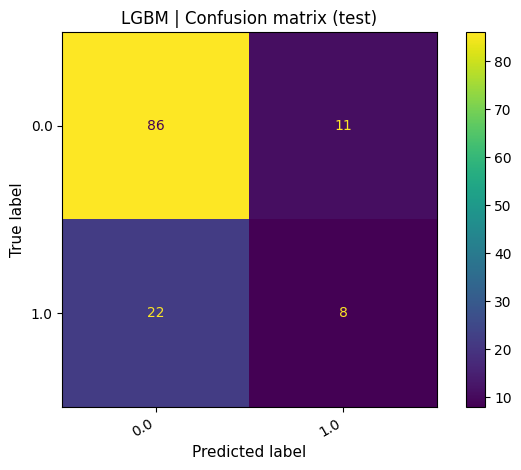

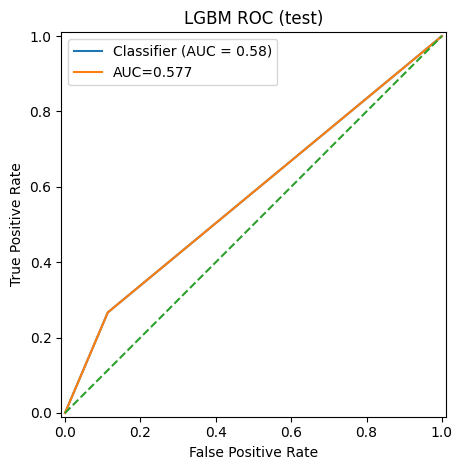

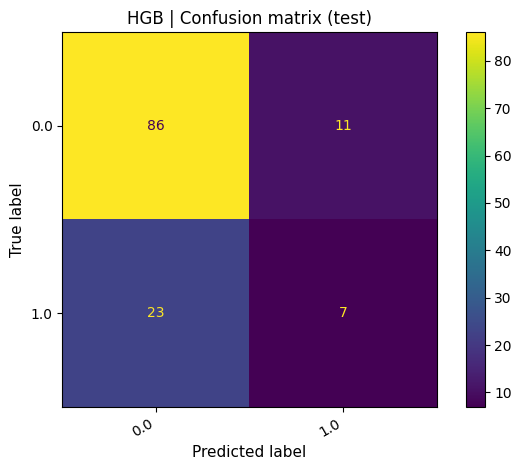

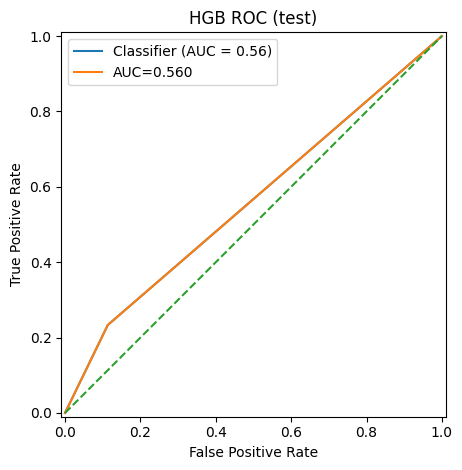

In [33]:
for name, pipe in top3_models.items():
    y_pred = pipe.predict(X_test)
    mf1 = f1_score(y_test, y_pred, average="macro")

    print("\n" + "="*70)
    print(name, "TEST macro-F1 =", round(mf1, 4))

    plot_confmat(y_test, y_pred, title=f"{name} | Confusion matrix (test)")#, savepath=False,show=False)
    plot_roc_if_binary(pipe, X_test, y_test, title=f"{name} ROC (test)")



In [34]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
import os

def shap_analysis(
    pipe,
    X_train: pd.DataFrame,
    X_test: pd.DataFrame,
    model_name: str,
    class_names=None,
    background_size: int = 100,
    random_state: int = 42,
    make_plots: bool = True,
    savepath: str | None = None,
    max_evals: int = 2000
):
    """
    Compute SHAP values for any scikit-learn model (tree or non-tree),
    and optionally plot summary, bar, and force plots for binary or multiclass.

    Returns:
        imp_global : pd.Series, global feature importance
        imp_per_class : dict, class-specific importance
        shap_exp : shap.Explanation, raw SHAP object
    """
    feat_names = X_test.columns.tolist()
    rng = np.random.default_rng(random_state)

    # Background subset from TRAIN
    bg_n = min(background_size, len(X_train))
    bg_idx = rng.choice(len(X_train), size=bg_n, replace=False)
    X_bg = X_train.iloc[bg_idx]

    # Choose explainer
    if hasattr(pipe.named_steps['clf'], "predict_proba"):
        explainer = shap.Explainer(pipe.predict_proba, X_bg, seed=random_state)
    else:
        # fallback for models like SVM with probability=False
        explainer = shap.Explainer(pipe.predict, X_bg, seed=random_state)

    shap_exp = explainer(X_test, max_evals=max_evals)
    shap_values = np.array(shap_exp.values)

    # Handle binary classification (flatten 3D -> 2D)
    if shap_values.ndim == 3 and shap_values.shape[2] == 2:
        # Keep positive class only
        shap_values_pos = shap_values[:, :, 1]
        shap_values = shap_values_pos

    # ---------- 1) Global importance ----------
    global_vals = np.mean(np.abs(shap_values), axis=0)
    imp_global = pd.Series(global_vals, index=feat_names).sort_values(ascending=False)

    # ---------- 2) Class-specific importance ----------
    imp_per_class = {}
    if class_names is not None:
        for k, cls in enumerate(class_names):
            if shap_values.ndim == 2:
                # binary case: class-specific = same as positive class
                imp_per_class[cls] = imp_global
            else:
                class_vals = np.mean(np.abs(shap_values[:, :, k]), axis=0)
                imp_per_class[cls] = pd.Series(class_vals, index=feat_names).sort_values(ascending=False)

    # ---------- 3) Plots ----------
    if make_plots:
        # Summary plot
        shap.summary_plot(shap_values, X_test, feature_names=feat_names, show=True)

        # Bar plot
        explanation = shap.Explanation(values=shap_values, data=X_test, feature_names=feat_names)
        clustering = shap.utils.hclust(X_test)
        shap.plots.bar(explanation, clustering=clustering)

    return imp_global, imp_per_class, shap_exp, explainer

In [36]:
def shap_force_plot(shap_exp, explainer, X_test, sample_idx=0, binary=True):
    shap.initjs()

    if binary:
        # For binary, pick positive class
        shap_vals = shap_exp.values[sample_idx, :, 1] if shap_exp.values.ndim == 3 else shap_exp.values[sample_idx, :]
    else:
        # For multiclass, choose class index 0 by default
        shap_vals = shap_exp.values[sample_idx, :, 0]

    # Use 0 as base_value if explainer has no expected_value
    base_value = getattr(explainer, 'expected_value', 0)
    if np.isscalar(base_value):
        ev = base_value
    else:
        ev = base_value[1] if binary else base_value[0]

    return shap.force_plot(
        ev,
        shap_vals,
        X_test.iloc[sample_idx] if isinstance(X_test, pd.DataFrame) else X_test[sample_idx]
    )

In [37]:
best_models = top3_models

binary_class_names = ["No", "Yes"]

for m, pipe in best_models.items():
    print(f"SHAP analysis for {m}")
    imp_global, imp_per_class, shap_exp, explainer = shap_analysis(
        pipe=pipe,
        X_train=X_train,
        X_test=X_test,
        model_name=m,
        class_names=binary_class_names,
        make_plots=True
    )

    # Force plot for first sample
    force_plot_html = shap_force_plot(shap_exp, explainer, X_test, sample_idx=0)
    display(force_plot_html)